In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/drive/MyDrive/21_05_Performa 미터 값.csv',encoding='cp949')

In [102]:
df1 = pd.read_csv('/content/drive/MyDrive/21_05_total_Performa 미터 값.csv',encoding='cp949')

In [9]:
df.head()

,YSI_12,AC_12,Bias_12,YSI_25,AC_25,Bias_25,YSI_26,AC_26,Bias_26,YSI_28,AC_28,Bias_28
0,91.066637,98,48.071525,94.261364,101,45.409220,97.271914,108.0,115.091826,82.007739,88,35.907197
1,390.346975,380,7.026275,90.999120,103,144.021127,83.942390,88.0,16.464196,95.930233,94,3.725798
2,405.082295,390,13.862717,90.340397,97,44.350315,98.465909,97.0,2.148889,90.448944,94,12.610001
3,345.584964,325,35.480568,101.831421,107,25.761949,93.005296,97.0,15.957663,98.522727,103,20.045971
4,93.158251,94,0.708542,91.412296,96,21.047030,87.698063,96.0,68.922152,92.894969,96,9.641217


In [90]:
def PBR(df,name1,name2):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from itertools import product 
  from itertools import combinations
  import seaborn as sns
  import warnings
  warnings.filterwarnings("ignore") #여기까지 라이브러리 호출
  
  # df: 데이터 전체 
  # x: x축에 그릴 데이터 컬럼명
  # y: y축에 그릴 데이터 컬럼명
  
  ####################################################################

  # 데이터 결측값 확인 
  df = df[[name1,name2]]
  df = df.dropna(axis=0)

  # 데이터 분리
  X = pd.DataFrame(df[name1])
  Y = pd.DataFrame(df[name2])

  list_X = np.array(X[name1].tolist())
  list_Y = np.array(Y[name2].tolist())
  
  # 모든 점을 이어 각각의 직선의 기울기 구하기 
  n = len(X)

  xij = list(combinations(list_X,2)) # xC2 (x중 2개씩 조합)
  xi = []
  xj = []
  for i in range(len(xij)):
    a = xij[i]
    xi.append(a[0])
    xj.append(a[1])
  
  yij = list(combinations(list_Y,2)) # yC2 (y중 2개씩 조합)
  yi = []
  yj = []
  for i in range(len(yij)):
    a = yij[i]
    yi.append(a[0])
    yj.append(a[1])

  ncomb = len(xi) # 점을 이어 만들 수 있는 직선의 개수 

  # 동일한 쌍인 경우는 제외하자 
  Sij = [] # 기울기 Sij(S) = (yi-yj)/(xi-xj)로 계산
 
  N = 0
  for i in range(ncomb):
    if xi != xj and yi != yj:
      S = (yi[i]-yj[i])/(xi[i]-xj[i])
      Sij.append(S)
      if Sij != -1:
        N+=1
       
  Sij.sort()
  
  K = 0 # 기울기가 -1보다 작은 직선 개수 카운트
  # *** The median is shifted based on the number of slopes where  b<-1 to create an unbiased estimator ***
  for i in range(len(Sij)):
    if Sij[i] < -1:
      K+=1

  if N%2 !=0:
    slope = Sij[int((N+1)/2+K)]
  else:
    slope = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])

  slope = round(slope,3)


  # y절편 구하기
  # *** a=median( y_{i}-b*x_{i} ) ***
  a = []
  for i in range(len(X)):
    ex = Y[name2][i] - X[name1][i]*slope
    a.append(ex)
  intercept = np.median(a)
  intercept = round(intercept,3)

  print('slope=',slope,'& intercept=',intercept) 



  # 그래프 그리기 
  
  day = input('데이터 날짜(yy-mm-dd) = ')

  if "Bias" in name2:
    reg_y = []
    for i in range(len(X)):
      reg_y.append(intercept+slope*X[name1][i])
      
    
    plt.figure(figsize=(9,6))
    plt.plot(X,Y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
    plt.plot(X, reg_y, c = 'r', label = day)

    plt.title('YSI & Bias', fontsize=18)
    plt.xlabel('YSI(mg/dL)', fontsize=14)
    plt.ylabel('Bias', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

  else: 
    reg_y = []
    for i in range(len(X)):
      reg_y.append(intercept+slope*X[name1][i])
      
    
    plt.figure(figsize=(9,6))
    plt.plot(X,Y,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
    plt.plot(X, reg_y, c = 'r', label = day)

    plt.title('YSI & accu-check', fontsize=18)
    plt.xlabel('YSI(mg/dL)', fontsize=14)
    plt.ylabel('accu-check', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()    


---

# 5월 일자별 그래프 확인

slope= 0.93 & intercept= 7.156
데이터 날짜(yy-mm-dd) = 21-05-12


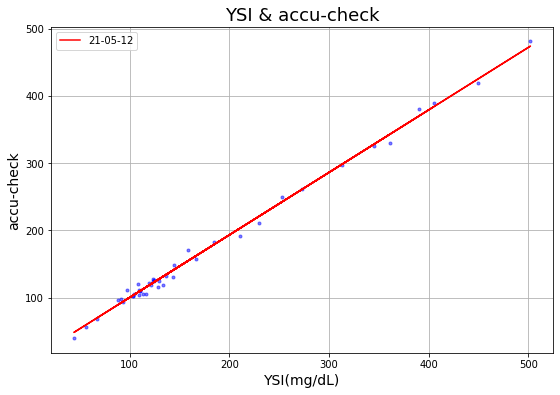

In [91]:
PBR(df,'YSI_12','AC_12')

slope= 0.145 & intercept= -10.103
데이터 날짜(yy-mm-dd) = 21-05-09


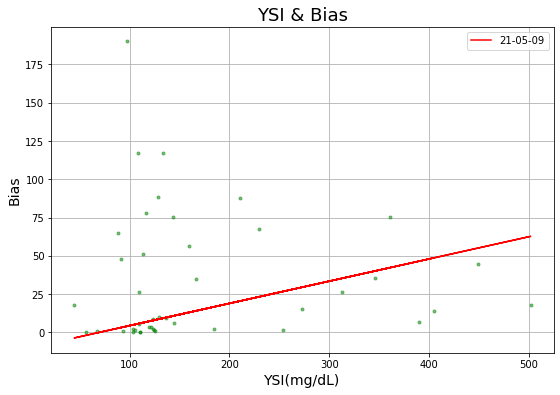

In [93]:
PBR(df,'YSI_12','Bias_12')

---

---

slope= 0.988 & intercept= 6.849
데이터 날짜(yy-mm-dd) = 21-05-25


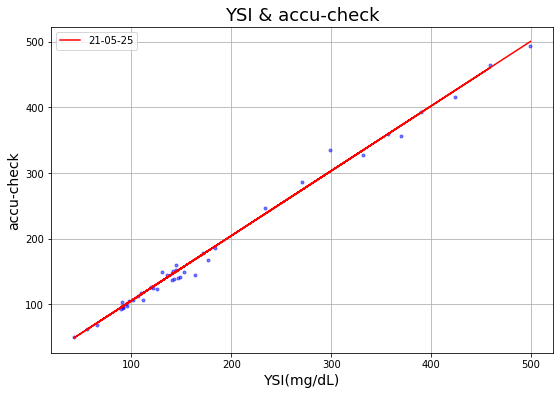

In [96]:
PBR(df,'YSI_25','AC_25')

slope= -0.002 & intercept= 21.23
데이터 날짜(yy-mm-dd) = 21-05-25


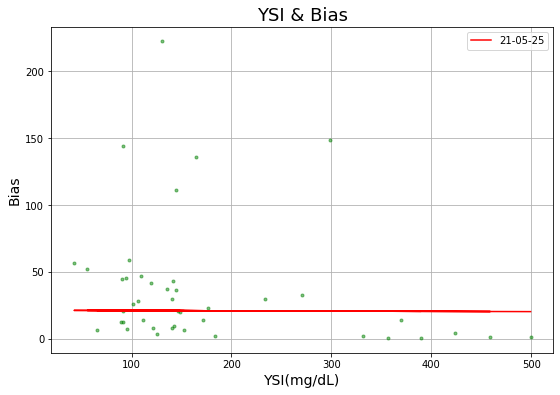

In [95]:
PBR(df,'YSI_25','Bias_25')

---

---

slope= 0.924 & intercept= 8.4
데이터 날짜(yy-mm-dd) = 21-05-26


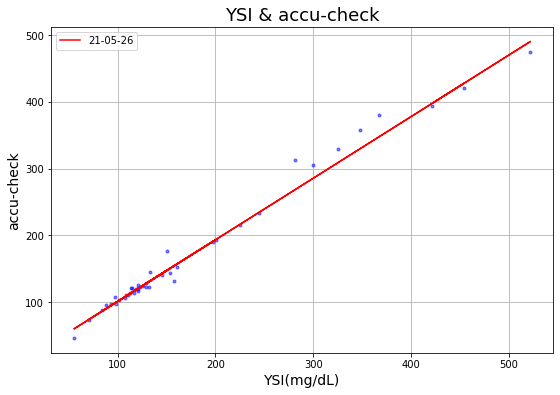

In [97]:
PBR(df,'YSI_26','AC_26')

slope= 0.166 & intercept= -13.09
데이터 날짜(yy-mm-dd) = 21-05-26


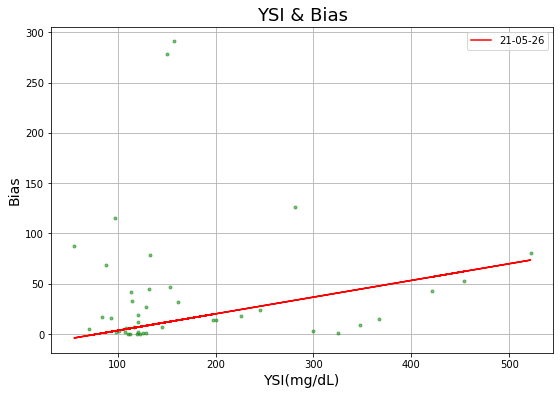

In [98]:
PBR(df,'YSI_26','Bias_26')

---

---

slope= 0.945 & intercept= 6.689
데이터 날짜(yy-mm-dd) = 21-05-28


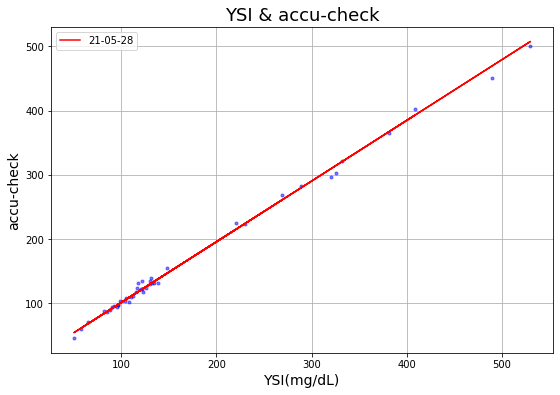

In [100]:
PBR(df,'YSI_28','AC_28')

slope= 0.062 & intercept= -1.328
데이터 날짜(yy-mm-dd) = 21-05-28


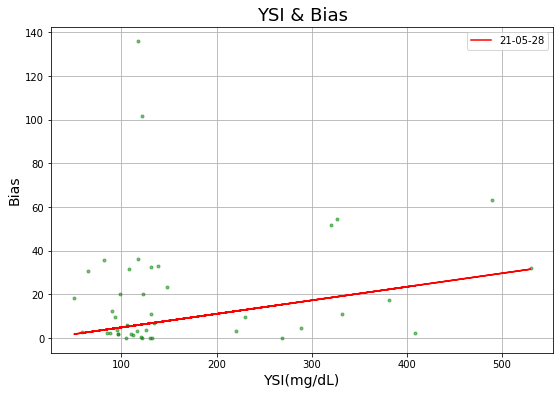

In [101]:
PBR(df,'YSI_28','Bias_28')

---

---

# 5월 전체

slope= 0.947 & intercept= 6.496
데이터 날짜(yy-mm-dd) = Total of May


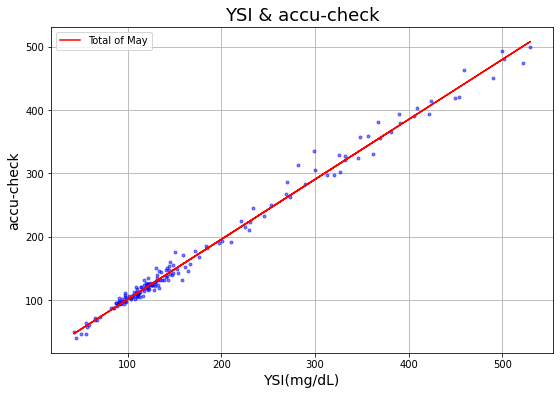

In [105]:
PBR(df1,'YSI','AC')

slope= 0.13 & intercept= -6.95
데이터 날짜(yy-mm-dd) = Total of May


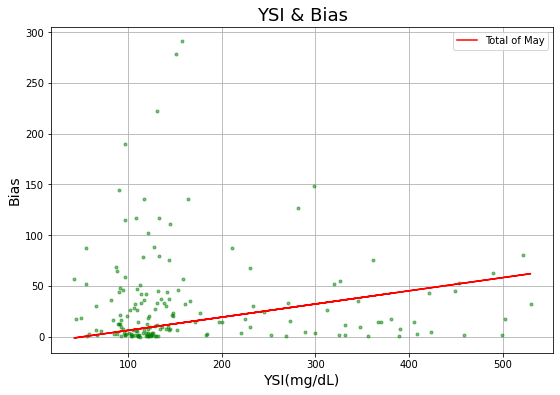

In [106]:
PBR(df1,'YSI','Bias')